<a href="https://colab.research.google.com/github/donw385/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/LS_DS_143_Introduction_to_Bayesian_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 143

## Introduction to Bayesian Inference

!['Detector! What would the Bayesian statistician say if I asked him whether the--' [roll] 'I AM A NEUTRINO DETECTOR, NOT A LABYRINTH GUARD. SERIOUSLY, DID YOUR BRAIN FALL OUT?' [roll] '... yes.'](https://imgs.xkcd.com/comics/frequentists_vs_bayesians_2x.png)

*[XKCD 1132](https://www.xkcd.com/1132/)*


## Prepare - Bayes' Theorem and the Bayesian mindset

Bayes' theorem possesses a near-mythical quality - a bit of math that somehow magically evaluates a situation. But this mythicalness has more to do with its reputation and advanced applications than the actual core of it - deriving it is actually remarkably straightforward.

### The Law of Total Probability

By definition, the total probability of all outcomes (events) if some variable (event space) $A$ is 1. That is:

$$P(A) = \sum_n P(A_n) = 1$$

The law of total probability takes this further, considering two variables ($A$ and $B$) and relating their marginal probabilities (their likelihoods considered independently, without reference to one another) and their conditional probabilities (their likelihoods considered jointly). A marginal probability is simply notated as e.g. $P(A)$, while a conditional probability is notated $P(A|B)$, which reads "probability of $A$ *given* $B$".

The law of total probability states:

$$P(A) = \sum_n P(A | B_n) P(B_n)$$

In words - the total probability of $A$ is equal to the sum of the conditional probability of $A$ on any given event $B_n$ times the probability of that event $B_n$, and summed over all possible events in $B$.

### The Law of Conditional Probability

What's the probability of something conditioned on something else? To determine this we have to go back to set theory and think about the intersection of sets:

The formula for actual calculation:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

We can see how this relates back to the law of total probability - multiply both sides by $P(B)$ and you get $P(A|B)P(B) = P(A \cap B)$ - replaced back into the law of total probability we get $P(A) = \sum_n P(A \cap B_n)$.

This may not seem like an improvement at first, but try to relate it back to the above picture - if you think of sets as physical objects, we're saying that the total probability of $A$ given $B$ is all the little pieces of it intersected with $B$, added together. The conditional probability is then just that again, but divided by the probability of $B$ itself happening in the first place.

### Bayes Theorem

Here is is, the seemingly magic tool:

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

In words - the probability of $A$ conditioned on $B$ is the probability of $B$ conditioned on $A$, times the probability of $A$ and divided by the probability of $B$. These unconditioned probabilities are referred to as "prior beliefs", and the conditioned probabilities as "updated."

Why is this important? Scroll back up to the XKCD example - the Bayesian statistician draws a less absurd conclusion because their prior belief in the likelihood that the sun will go nova is extremely low. So, even when updated based on evidence from a detector that is $35/36 = 0.972$ accurate, the prior belief doesn't shift enough to change their overall opinion.

There's many examples of Bayes' theorem - one less absurd example is to apply to [breathalyzer tests](https://www.bayestheorem.net/breathalyzer-example/). You may think that a breathalyzer test that is 100% accurate for true positives (detecting somebody who is drunk) is pretty good, but what if it also has 8% false positives (indicating somebody is drunk when they're not)? And furthermore, the rate of drunk driving (and thus our prior belief)  is 1/1000.

What is the likelihood somebody really is drunk if they test positive? Some may guess it's 92% - the difference between the true positives and the false positives. But we have a prior belief of the background/true rate of drunk driving. Sounds like a job for Bayes' theorem!

$$
\begin{aligned}
P(Drunk | Positive) &= \frac{P(Positive | Drunk)P(Drunk)}{P(Positive)} \\
&= \frac{1 \times 0.001}{0.08} \\
&= 0.0125
\end{aligned}
$$

In other words, the likelihood that somebody is drunk given they tested positive with a breathalyzer in this situation is only 1.25% - probably much lower than you'd guess. This is why, in practice, it's important to have a repeated test to confirm (the probability of two false positives in a row is $0.08 * 0.08 = 0.0064$, much lower), and Bayes' theorem has been relevant in court cases where proper consideration of evidence was important.

## Live Lecture - Deriving Bayes' Theorem, Calculating Bayesian Confidence

Notice that $P(A|B)$ appears in the above laws - in Bayesian terms, this is the belief in $A$ updated for the evidence $B$. So all we need to do is solve for this term to derive Bayes' theorem. Let's do it together!

$x = 2$ is an inline equation

$$
x = 2
$$

is a block equation.

$$
\begin{aligned}
x &= 2\\
&= 1 + 1
\end{aligned}
$$

Now let's derive Bayes!

$$
\begin{aligned}
P(A|B) &= \frac{P(A \cap B)}{P(B)}\\
\Rightarrow P(A|B)P(B) &= P(A \cap B)\\
P(B|A) &= \frac{P(B \cap A)}{P(A)}\\
\Rightarrow P(B|A)P(A) &= P(B \cap A)\\
P(A \cap B) &= P(B \cap A)\\
\Rightarrow P(A|B)P(B) &= P(B|A)P(A)
\\
\Rightarrow P(A|B) &=  \frac{P(B|A) \times P(A)}{P(B)}
\end{aligned}
$$

In [2]:
# Activity 2 - Use SciPy to calculate Bayesian confidence intervals
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bayes_mvs.html#scipy.stats.bayes_mvs
#changing n is sum of the total observations i.e. n = 10 is sum of 10 coin flips

from scipy import stats
import numpy as np

coinflips = np.random.binomial(n=1, p=0.5, size = 100)
print(coinflips)

[1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0
 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1
 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0]


In [3]:
#sem is standard error
#ppf is probability density function

def confidence_interval(data, confidence=0.95):
  #   takes data, returns (mean, lower bound, upper bound)
  n = len(data)
  mean = sum(data) / len(data)
  data=np.array(data)
  stderr=stats.sem(data)
  interval= stderr * stats.t.ppf((1+confidence)/2.,n-1)
  return (mean, mean - interval, mean + interval)

confidence_interval(coinflips)

(0.53, 0.43046898750173684, 0.6295310124982633)

In [4]:
#bayes confidence intervals
#default confidence for bayes is 0.90

stats.bayes_mvs(coinflips, alpha =0.95)

(Mean(statistic=0.53, minmax=(0.43046898750173684, 0.6295310124982633)),
 Variance(statistic=0.2568041237113401, minmax=(0.19396989770252077, 0.33955334265865467)),
 Std_dev(statistic=0.5054540733507159, minmax=(0.44042013771229943, 0.5827120581030176)))

In [5]:
coinflips_mean_dist, _, _ = stats.mvsdist(coinflips)
coinflips_mean_dist

In [6]:
coinflips_mean_dist.mean()

0.53

In [7]:
import pandas as pd
pd.DataFrame(coinflips).describe()

,0
count,100.000000
mean,0.530000
std,0.501614
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [8]:
coinflips_mean_dist.rvs(100)  # Bootstrapping! (or the atom of it)

array([0.55570243, 0.54944171, 0.49003692, 0.57346185, 0.57414572,
       0.62830035, 0.4700277 , 0.53512397, 0.47363358, 0.52699571,
       0.53162384, 0.61527343, 0.52202456, 0.43037467, 0.5472846 ,
       0.56036502, 0.53226227, 0.50103701, 0.48726559, 0.50240917,
       0.5256628 , 0.47026985, 0.51568272, 0.5905077 , 0.5027321 ,
       0.48064289, 0.57264195, 0.56693192, 0.62398023, 0.5642634 ,
       0.51974527, 0.49262119, 0.51853608, 0.54047456, 0.42919667,
       0.54125535, 0.44261674, 0.53097548, 0.49031577, 0.49085593,
       0.4954348 , 0.52307916, 0.42983506, 0.5553874 , 0.52208488,
       0.52147113, 0.61523291, 0.53953511, 0.51446665, 0.58532131,
       0.4337689 , 0.43154674, 0.53509685, 0.47061681, 0.46870842,
       0.52863089, 0.58738877, 0.50052408, 0.5412451 , 0.56412065,
       0.61610621, 0.65335362, 0.52866783, 0.55833857, 0.60197611,
       0.50381859, 0.54014273, 0.42389972, 0.44029819, 0.4917651 ,
       0.5250004 , 0.50570915, 0.42408352, 0.51972338, 0.61365

## Assignment - Code it up!

Most of the above was pure math - write Python code to reproduce the results. This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk) that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore scipy.stats.bayes_mvs - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goal - apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective.

Stretch goals:

Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
Check out PyMC3 (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
Take PyMC3 further - see if you can build something with it!

In [9]:
# TODO - code!

# Prob positive if drunk - 100%
# prob positive if not drunk 8%
# prob drunk is 1 / 1000
# prob drunk if positive should be 1.25%

def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk):
  return (prob_positive_drunk*prob_drunk_prior)/prob_positive

print(prob_drunk_given_positive(1/1000, .08, 1))



0.0125


In [10]:
#1000 coin flips

import numpy as np
data_coin_flips = np.random.randint(2, size=1000)
np.mean(data_coin_flips)


0.492

In [11]:
#sample dist
bernoulli_flips = np.random.binomial(n=1, p=.5, size=1000)
np.mean(bernoulli_flips)

0.47

In [0]:
# takes a single observed data point and then given the parameters (p in our case) returns the probablility of seeing that data point given those parameters

def bern_pmf(x, p):
    if (x == 1):
        return p
    elif (x == 0):
        return 1 - p
    else:
        return "Value Not in Support of Distribution"

In [13]:
print(bern_pmf(1, .5))
print(bern_pmf(0, .5))

0.5
0.5


In [15]:
import scipy.stats as st
print(st.bernoulli.pmf(1, .5))
print(st.bernoulli.pmf(0, .5))

0.5
0.5


In [21]:
!pip install --upgrade seaborn


    100% |████████████████████████████████| 215kB 4.5MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


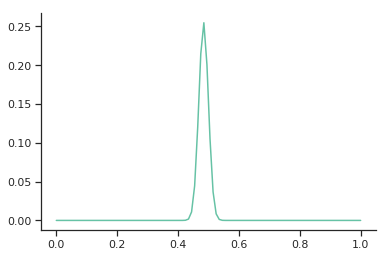

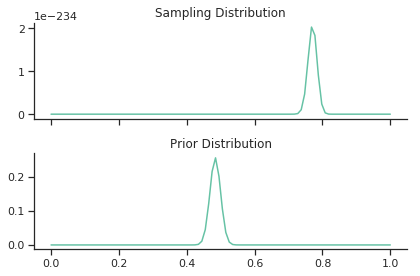

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='ticks', palette='Set2')
 
fair_flips = bernoulli_flips = np.random.binomial(n=1, p=.5, size=1000)
p_fair = np.array([np.product(st.bernoulli.pmf(fair_flips, p)) for p in params])
p_fair = p_fair / np.sum(p_fair)
plt.plot(params, p_fair)
sns.despine()
unfair_flips = bernoulli_flips = np.random.binomial(n=1, p=.8, size=1000)
p_unfair = np.array([np.product(st.bernoulli.pmf(unfair_flips, p)) for p in params])
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(params, p_unfair)
axes[0].set_title("Sampling Distribution")
axes[1].plot(params, p_fair)
axes[1].set_title("Prior Distribution")
sns.despine()
plt.tight_layout()

In [0]:
def bern_post(n_params=100, n_sample=100, true_p=.8, prior_p=.5, n_prior=100):
    params = np.linspace(0, 1, n_params)
    sample = np.random.binomial(n=1, p=true_p, size=n_sample)
    likelihood = np.array([np.product(st.bernoulli.pmf(sample, p)) for p in params])
    #likelihood = likelihood / np.sum(likelihood)
    prior_sample = np.random.binomial(n=1, p=prior_p, size=n_prior)
    prior = np.array([np.product(st.bernoulli.pmf(prior_sample, p)) for p in params])
    prior = prior / np.sum(prior)
    posterior = [prior[i] * likelihood[i] for i in range(prior.shape[0])]
    posterior = posterior / np.sum(posterior)
     
    fig, axes = plt.subplots(3, 1, sharex=True, figsize=(8,8))
    axes[0].plot(params, likelihood)
    axes[0].set_title("Sampling Distribution")
    axes[1].plot(params, prior)
    axes[1].set_title("Prior Distribution")
    axes[2].plot(params, posterior)
    axes[2].set_title("Posterior Distribution")
    sns.despine()
    plt.tight_layout()
     
    return posterior

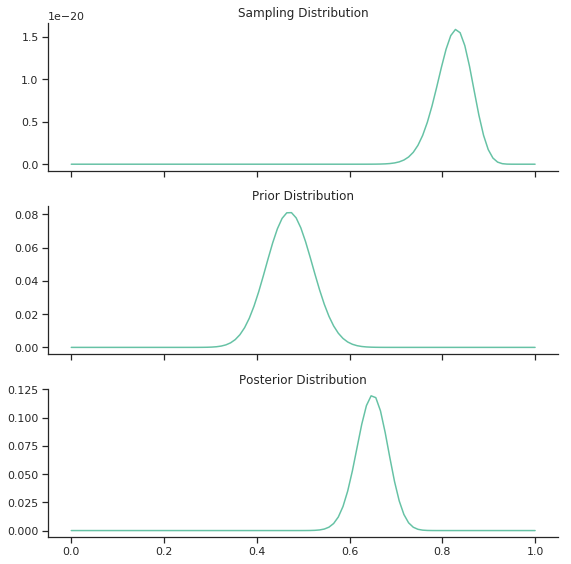

In [20]:
example_post = bern_post()

In [0]:


import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 22
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import pymc3 as pm



In [0]:

#zoo only animals are lions and tigers and bears (unknown q)
# During the tour, we see 3 lions, 2 tigers, and 1 bear. if equal distribution, What is the probability that the next animal we see is a bear?
# observations
animals = ['lions', 'tigers', 'bears']
c = np.array([3, 2, 1])

# hyperparameters (initially all equal)
alphas = np.array([1, 1, 1])

In [6]:
#expected value, take the previous information (observations) and adds to it the expected of 1/3
print(dict(zip(animals, (alphas + c) / (c.sum() + alphas.sum()))))

{'lions': 0.4444444444444444, 'tigers': 0.3333333333333333, 'bears': 0.2222222222222222}


In [9]:
#frequentist view, just take the previous data set
print(dict(zip(animals, (alphas + c - 1) / sum(alphas + c - 1))))

{'lions': 0.5, 'tigers': 0.3333333333333333, 'bears': 0.16666666666666666}


In [0]:
#bayesian takes prior beliefs and uses it to predict future events
#frequentists assigns beliefs numerically only from observed observations